# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [27]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [8]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [9]:
data_a = np.concatenate([np.ones(clicks_a), np.zeros(visitors_a - clicks_a)])
data_b = np.concatenate([np.ones(clicks_b), np.zeros(visitors_b - clicks_b)])

np.random.shuffle(data_a)
np.random.shuffle(data_b)

ctr_a = np.mean(data_a)
ctr_b = np.mean(data_b)

print("CTR Version A:", ctr_a)
print("CTR Version B:", ctr_b)

CTR Version A: 0.15
CTR Version B: 0.17142857142857143


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [10]:
# Null Hypothesis (H₀): `#TODO`.
# Alternative Hypothesis `#TODO`.
non_clicks_a = visitors_a - clicks_a
non_clicks_b = visitors_b - clicks_b

contingency_table = np.array([
    [clicks_a, non_clicks_a],
    [clicks_b, non_clicks_b]
])

print("Contingency Table:")
print(contingency_table)

Contingency Table:
[[150 850]
 [180 870]]



- Run the Test

In [11]:
# TODO
# Insert your code HERE
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Chi-Square Statistic: 1.586311673629987
P-value: 0.20785388523374118
Degrees of Freedom: 1
Expected Frequencies:
[[160.97560976 839.02439024]
 [169.02439024 880.97560976]]


> Interpret Results

In [12]:
# TODO
# Insert your code HERE

#At the given significance level, the differences in CTR between Version A and Version B are not statistically significant. This suggests that the observed differences (with Version B having slightly more clicks) could be due to random chance, and there is insufficient evidence to claim that the new version significantly improves CTR compared to the original.

📈 Visualization

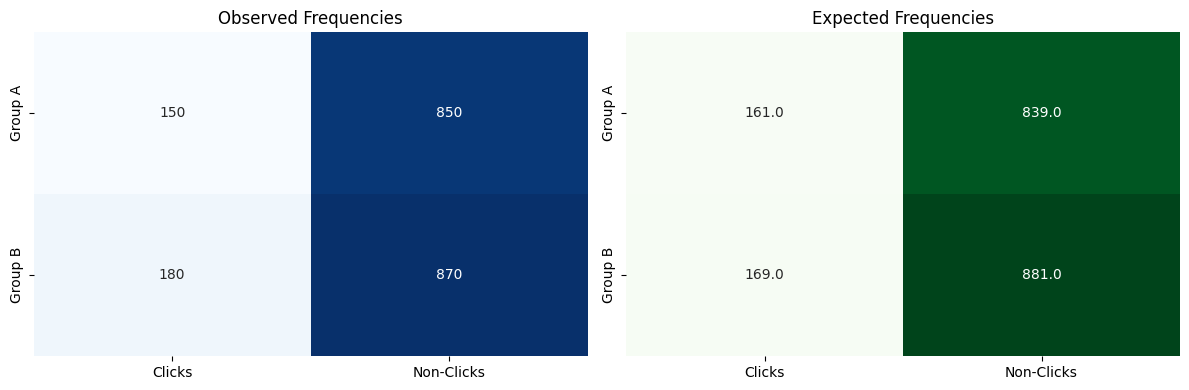

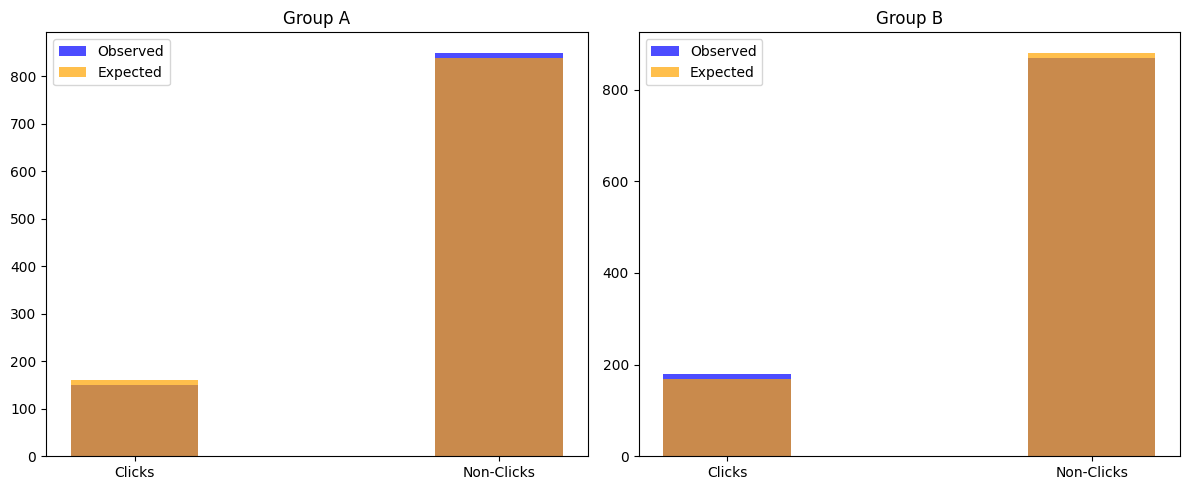

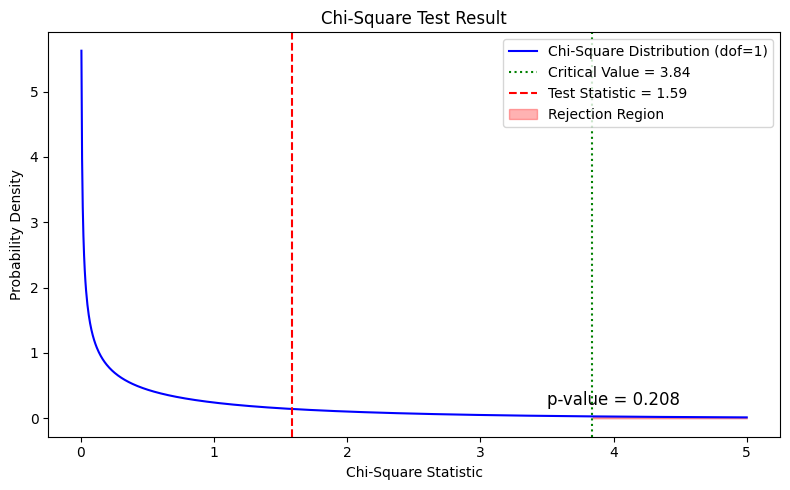

In [28]:
# TODO
# Insert your code HERE

# Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False,
            xticklabels=['Clicks', 'Non-Clicks'], yticklabels=['Group A', 'Group B'])
axes[0].set_title('Observed Frequencies')  # Translated title

sns.heatmap(expected, annot=True, fmt=".1f", cmap="Greens", ax=axes[1], cbar=False,
            xticklabels=['Clicks', 'Non-Clicks'], yticklabels=['Group A', 'Group B'])
axes[1].set_title('Expected Frequencies')  # Translated title
plt.tight_layout()
plt.show()

# Bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
categories = ['Clicks', 'Non-Clicks']
width = 0.35

ax1.bar(categories, contingency_table[0], width, label='Observed', color='blue', alpha=0.7)  # Translated label
ax1.bar(categories, expected[0], width, label='Expected', color='orange', alpha=0.7)  # Translated label
ax1.set_title('Group A')  # Translated title
ax1.legend()

ax2.bar(categories, contingency_table[1], width, label='Observed', color='blue', alpha=0.7)
ax2.bar(categories, expected[1], width, label='Expected', color='orange', alpha=0.7)
ax2.set_title('Group B')  # Translated title
ax2.legend()
plt.tight_layout()
plt.show()

# Chi-square distribution plot
fig, ax = plt.subplots(figsize=(8, 5))
x = np.linspace(0, 5, 1000)
chi_pdf = stats.chi2.pdf(x, dof)
ax.plot(x, chi_pdf, 'b-', label=f'Chi-Square Distribution (dof={dof})')  # Translated label

critical_value = stats.chi2.ppf(0.95, dof)
ax.axvline(critical_value, color='green', linestyle=':', label=f'Critical Value = {critical_value:.2f}')  # Translated
ax.axvline(chi2, color='red', linestyle='--', label=f'Test Statistic = {chi2:.2f}')  # Translated
ax.fill_between(x, chi_pdf, where=(x >= critical_value), color='red', alpha=0.3, label='Rejection Region')  # Translated
ax.text(3.5, 0.2, f'p-value = {p_value:.3f}', fontsize=12)  # Already in English

ax.set_title('Chi-Square Test Result')  # Translated title
ax.set_xlabel('Chi-Square Statistic')  # Translated label
ax.set_ylabel('Probability Density')  # Translated label
ax.legend()
plt.tight_layout()
plt.show()

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [14]:
### Import Libraries

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [30]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [32]:
# TODO
# Insert your code HERE
group_a = data[data["test group"] == "psa"]["converted"]
group_b = data[data["test group"] == "ad"]["converted"]

> Statistical Test

In [34]:
# TODO
# Insert your code HERE
tstat, pvalue = stats.ttest_ind(group_a, group_b) 
# Print the results 
print(f"T-statistic: {tstat}") 
print(f"P-value: {pvalue}")

T-statistic: -7.37040597428566
P-value: 1.7033052627831264e-13


#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [35]:
def bootstrap(data, n_resamples=1000, ci=95):
    resampled_means = []
    
    for _ in range(n_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)
        resampled_means.append(np.mean(resample))

    lower_bound = np.percentile(resampled_means, (100 - ci) / 2)
    upper_bound = np.percentile(resampled_means, ci + (100 - ci) / 2)
    
    return lower_bound, upper_bound, resampled_means

# Apply bootstrapping to the groups
lower_bound_a, upper_bound_a, boot_means_a = bootstrap(group_a)
lower_bound_b, upper_bound_b, boot_means_b = bootstrap(group_b)

# Print the confidence intervals
print(f"95% confidence interval for Group A: ({lower_bound_a:.3f}, {upper_bound_a:.3f})")
print(f"95% confidence interval for Group B: ({lower_bound_b:.3f}, {upper_bound_b:.3f})")


95% confidence interval for Group A: (0.016, 0.020)
95% confidence interval for Group B: (0.025, 0.026)


>Visualize Resultsm

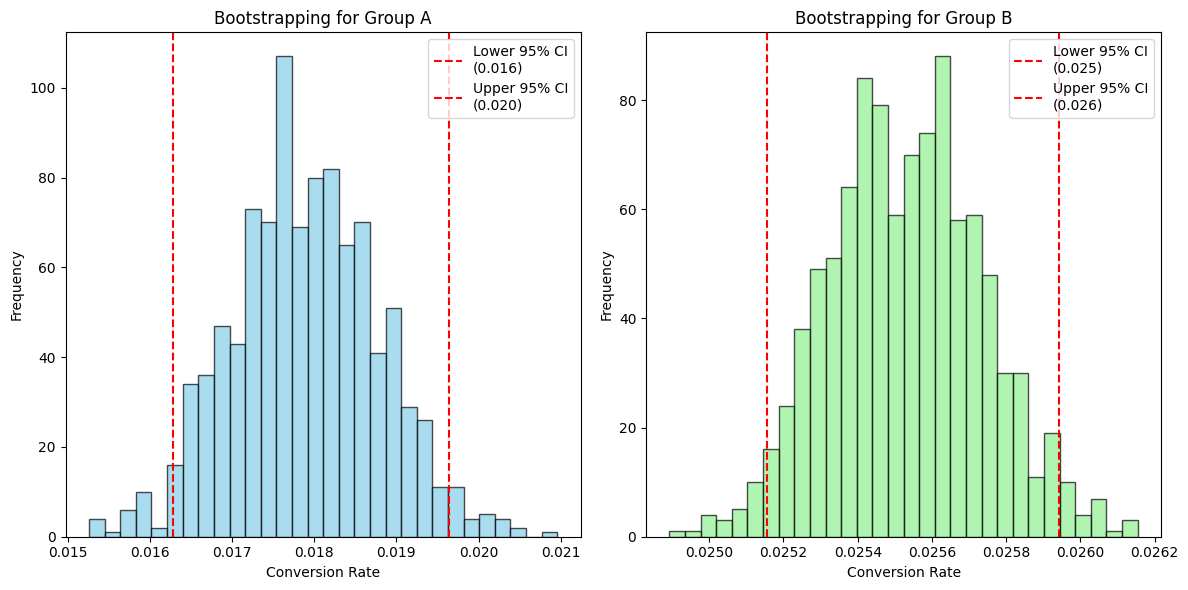

In [36]:
# TODO
# Insert your code HERE
# Visualization: Plot histograms of the bootstrapped means for each group
plt.figure(figsize=(12, 6))

# Histogram for Group A
plt.subplot(1, 2, 1)
plt.hist(boot_means_a, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound_a, color='red', linestyle='--', label=f'Lower 95% CI\n({lower_bound_a:.3f})')
plt.axvline(upper_bound_a, color='red', linestyle='--', label=f'Upper 95% CI\n({upper_bound_a:.3f})')
plt.title('Bootstrapping for Group A')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Group B
plt.subplot(1, 2, 2)
plt.hist(boot_means_b, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound_b, color='red', linestyle='--', label=f'Lower 95% CI\n({lower_bound_b:.3f})')
plt.axvline(upper_bound_b, color='red', linestyle='--', label=f'Upper 95% CI\n({upper_bound_b:.3f})')
plt.title('Bootstrapping for Group B')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [20]:
# Import Libraries

In [39]:
# Load dataset 
df = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [46]:
# TODO
# Insert your code HERE


# Assuming your data is in a DataFrame called df
# For example: df = pd.read_csv('your_data.csv')

# Filter the dataset for versions "gate_30" and "gate_40"
df_gate_30 = df[df['version'] == 'gate_30']
df_gate_40 = df[df['version'] == 'gate_40']

# Calculate the number of users and the number of users with 1-day retention (retention_1 == True)
n_gate_30 = len(df_gate_30)
n_gate_40 = len(df_gate_40)

# When retention_1 is a boolean, summing it gives the count of True values
retained_gate_30 = df_gate_30['retention_1'].sum()
retained_gate_40 = df_gate_40['retention_1'].sum()

# Print the basic counts
print("gate_30: Total users =", n_gate_30, ", Retained (1-day) =", retained_gate_30)
print("gate_40: Total users =", n_gate_40, ", Retained (1-day) =", retained_gate_40)

print(f"1-Day Retention Rate (Gate 30): {retained_gate_30/n_gate_30:.3f}")
print(f"1-Day Retention Rate (Gate 40): {retained_gate_40/n_gate_40:.3f}")


gate_30: Total users = 44700 , Retained (1-day) = 20034
gate_40: Total users = 45489 , Retained (1-day) = 20119
1-Day Retention Rate (Gate 30): 0.448
1-Day Retention Rate (Gate 40): 0.442


> Statistical Test

In [50]:
# TODO
# Insert your code HERE

counts = np.array([retained_gate_30, retained_gate_40])
nobs = np.array([n_gate_30, n_gate_40])

# Perform the Z-test for two proportions
z_stat, p_value = proportions_ztest(counts, nobs, alternative="larger")

print("Z statistic:", z_stat)
print("P-value:", p_value)

Z statistic: 1.7840862247974725
P-value: 0.03720482764845957


📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

Sample size: 500 - p-value: 0.0554
Sample size: 1000 - p-value: 0.5038
Sample size: 1500 - p-value: 0.9379
Sample size: 2000 - p-value: 0.7989
Sample size: 2500 - p-value: 0.9158
Sample size: 3000 - p-value: 0.3026
Sample size: 3500 - p-value: 0.2695
Sample size: 4000 - p-value: 0.2970
Sample size: 4500 - p-value: 0.0609
Sample size: 5000 - p-value: 0.0966
Sample size: 5500 - p-value: 0.0861
Sample size: 6000 - p-value: 0.0876
Sample size: 6500 - p-value: 0.0660
Sample size: 7000 - p-value: 0.1123
Sample size: 7500 - p-value: 0.0402
Sample size: 8000 - p-value: 0.0586
Sample size: 8500 - p-value: 0.0337
Sample size: 9000 - p-value: 0.0392
Sample size: 9500 - p-value: 0.0556
Sample size: 10000 - p-value: 0.0670
Sample size: 10500 - p-value: 0.0291
Sample size: 11000 - p-value: 0.0128
Sample size: 11500 - p-value: 0.0055
Sample size: 12000 - p-value: 0.0119
Sample size: 12500 - p-value: 0.0299
Sample size: 13000 - p-value: 0.0142
Sample size: 13500 - p-value: 0.0074
Sample size: 14000 - 

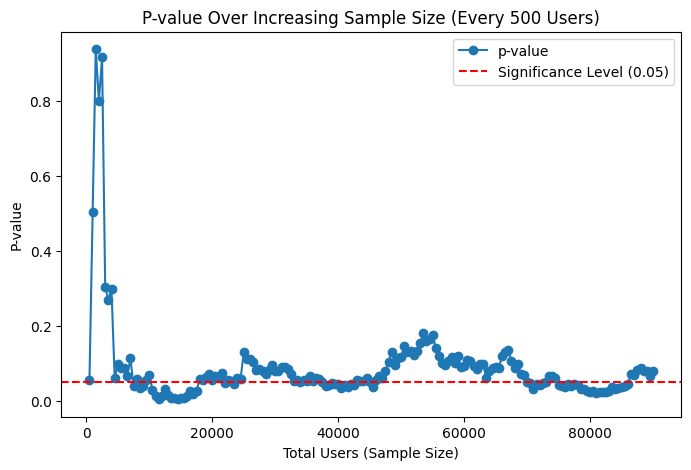

In [51]:
# TODO
# Insert your code HERE
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Set the interval for checking results
interval = 500
p_values = []
sample_sizes = []

# Iterate over the dataset in increments of 500 users
for current_n in range(interval, len(df_shuffled) + 1, interval):
    # Consider the first current_n users in the shuffled DataFrame
    df_subset = df_shuffled.iloc[:current_n]
    
    # Filter the dataset by version
    df_gate_30 = df_subset[df_subset['version'] == 'gate_30']
    df_gate_40 = df_subset[df_subset['version'] == 'gate_40']
    
    # Skip the interval if one of the groups is empty
    if len(df_gate_30) == 0 or len(df_gate_40) == 0:
        continue

    # Calculate the number of users in each group
    n_gate_30 = len(df_gate_30)
    n_gate_40 = len(df_gate_40)
    
    # Sum of True values in 'retention_1' gives us the number of retained users 
    retained_gate_30 = df_gate_30['retention_1'].sum()
    retained_gate_40 = df_gate_40['retention_1'].sum()
    
    # Setup for the Z-test for proportions
    counts = np.array([retained_gate_30, retained_gate_40])
    nobs = np.array([n_gate_30, n_gate_40])
    
    z_stat, p_value = proportions_ztest(counts, nobs)
    
    sample_sizes.append(current_n)
    p_values.append(p_value)
    
    print(f"Sample size: {current_n} - p-value: {p_value:.4f}")

# Plotting the p-values over increasing sample size
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, p_values, marker='o', linestyle='-', label='p-value')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title("P-value Over Increasing Sample Size (Every 500 Users)")
plt.xlabel("Total Users (Sample Size)")
plt.ylabel("P-value")
plt.legend()
plt.show()

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [53]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Assumed baseline and target conversion rates
p1 = 0.15  # Group A baseline conversion rate
p2 = 0.18  # Group B target conversion rate

# Calculate effect size using Cohen's h
effect_size = proportion_effectsize(p1, p2)
print(f"Effect size (Cohen's h): {effect_size:.3f}")

# Define the significance level and desired power level
alpha = 0.05  # Significance level
power = 0.8   # Desired power (80%)
ratio = 1     # Ratio of sample sizes between the two groups (balanced design)

# Create a power analysis object and solve for required sample size per group
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, 
                                   alpha=alpha, 
                                   power=power, 
                                   ratio=ratio, 
                                   alternative='two-sided')
print(f"Required sample size per group: {sample_size:.0f}")


Effect size (Cohen's h): -0.081
Required sample size per group: 2399


Enjoy & Happy A/B Testing :) ......!